In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [137]:
img = cv2.imread("/content/chromosomes.jpg")
img_rgb= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [138]:
img.shape

(842, 900, 3)

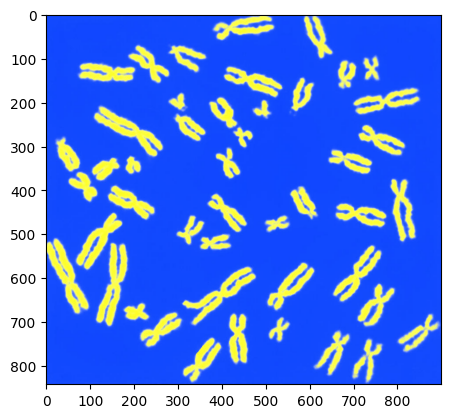

In [139]:
plt.imshow(img_rgb)

In [140]:
img_grey = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

In [141]:
img_grey.shape

(842, 900)

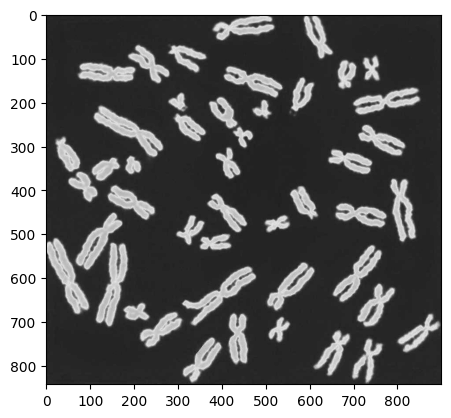

In [142]:
plt.imshow(img_grey, cmap='gray')

In [143]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

In [144]:
open_img = cv2.morphologyEx(img_grey, cv2.MORPH_OPEN, kernel)

In [145]:
_, threshold_img = cv2.threshold(open_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Otsu's technique uses the image histogram to obtain an ideal global threshold value.

In [146]:
contours, _ = cv2.findContours(threshold_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [147]:
len(contours)

46

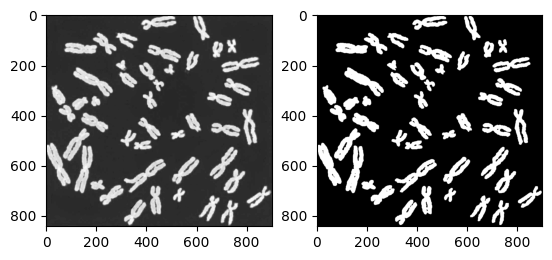

In [148]:
plt.subplot(121), plt.imshow(open_img, cmap='gray')
plt.subplot(122), plt.imshow(threshold_img, cmap='gray')
plt.show()

In [149]:
x = cv2.drawContours(img, contours, -1, (0,255,0), 2)

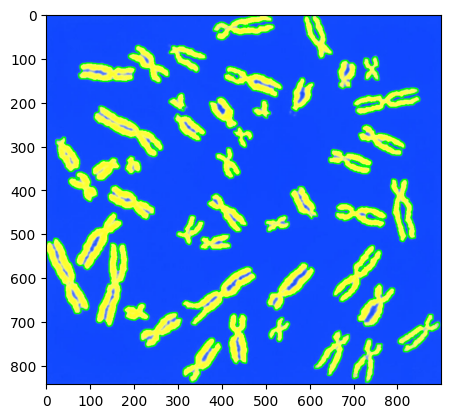

In [150]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [151]:
columns = ["X", "Y", "Width", "Height", "Area", "Circularity", "Perimeter"]
df = pd.DataFrame(columns = columns)

In [152]:
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, closed=True)
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 3)
    cicularity = (4*np.pi*area)/(perimeter**2)
    df = df.append({
      "X":x, "Y": y, "Width": w, "Height": h, "Area": area, "Circularity": cicularity, "Perimeter": perimeter
  }, ignore_index=True)

<ipython-input-152-580b90590122>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
<ipython-input-152-580b90590122>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
<ipython-input-152-580b90590122>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
<ipython-input-152-580b90590122>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
<ipython-input-152-580b90590122>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
<ipython-input-152-580b90590122>:7: FutureWarning: The frame

In [153]:
df

,X,Y,Width,Height,Area,Circularity,Perimeter
0,696.0,739.0,68.0,99.0,2528.0,0.183829,415.705624
1,311.0,737.0,88.0,101.0,3550.5,0.329914,367.747254
2,610.0,720.0,80.0,103.0,2854.5,0.186246,438.859952
3,506.0,690.0,48.0,56.0,1177.5,0.321873,214.409161
4,800.0,683.0,95.0,86.0,2626.0,0.165227,446.901582
5,415.0,682.0,44.0,114.0,3700.0,0.338546,370.592927
6,214.0,679.0,95.0,79.0,3316.5,0.453411,303.178713
7,177.0,658.0,57.0,39.0,1446.5,0.542217,183.095453
8,708.0,614.0,85.0,97.0,3664.0,0.393868,341.906634
9,310.0,575.0,167.0,133.0,5970.5,0.250101,547.712764


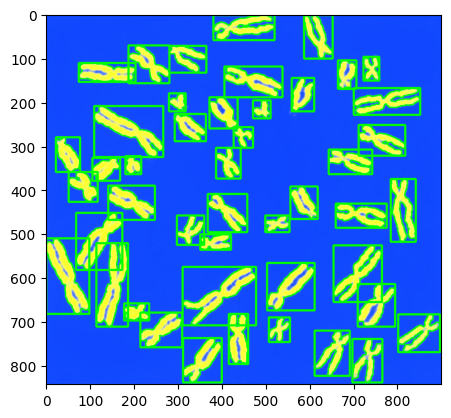

In [154]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [155]:
from sklearn.preprocessing import MinMaxScaler

feature_to_normalise = ["Width", "Height", "Area", "Circularity", "Perimeter"]
scaler = MinMaxScaler()
df[feature_to_normalise] = scaler.fit_transform(df[feature_to_normalise])

In [156]:
df

,X,Y,Width,Height,Area,Circularity,Perimeter
0,696.0,739.0,0.244275,0.412903,0.305493,0.100607,0.562868
1,311.0,737.0,0.396947,0.425806,0.490544,0.352951,0.467840
2,610.0,720.0,0.335878,0.438710,0.364582,0.104782,0.608747
3,506.0,690.0,0.091603,0.135484,0.061080,0.339061,0.164005
4,800.0,683.0,0.450382,0.329032,0.323229,0.068474,0.624682
5,415.0,682.0,0.061069,0.509677,0.517600,0.367861,0.473478
6,214.0,679.0,0.450382,0.283871,0.448195,0.566278,0.339899
7,177.0,658.0,0.160305,0.025806,0.109764,0.719680,0.101958
8,708.0,614.0,0.374046,0.400000,0.511085,0.463423,0.416637
9,310.0,575.0,1.000000,0.632258,0.928513,0.215083,0.824436


In [157]:
from scipy import stats
z_scores = stats.zscore(df[feature_to_normalise])
outliers = (z_scores > 3) | (z_scores<-3)
outliers_sum = outliers.sum(axis=1)
# outliers_df = pd.DataFrame(outliers, columns= df[feature_to_normalise].columns)
outliers_df = pd.DataFrame({'Outliers': outliers_sum>0})
outliers_df

,Outliers
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [158]:
df[outliers_df['Outliers']]

,X,Y,Width,Height,Area,Circularity,Perimeter
12,114.0,521.0,0.274809,1.0,0.988689,0.156062,0.93923
